In [1]:
!pip install pycaret --q

     |████████████████████████████████| 264 kB 2.7 MB/s 
     |████████████████████████████████| 56 kB 3.1 MB/s 
     |████████████████████████████████| 2.0 MB 40.8 MB/s 
     |████████████████████████████████| 14.6 MB 111 kB/s 
     |████████████████████████████████| 167 kB 64.5 MB/s 
     |████████████████████████████████| 111 kB 58.1 MB/s 
     |████████████████████████████████| 271 kB 43.2 MB/s 
     |████████████████████████████████| 80 kB 6.7 MB/s 
     |████████████████████████████████| 1.3 MB 36.0 MB/s 
     |████████████████████████████████| 6.8 MB 44.8 MB/s 
     |████████████████████████████████| 1.7 MB 53.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 248 kB 58.3 MB/s 
     |████████████████████████████████| 62 kB 488 kB/s 
     |████████████████████████████████| 10.1 MB 48.9 MB/s 
     |███████████████████

In [2]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
stroke_data = pd.read_csv('healthcare.csv')

In [4]:
stroke_data.shape

(5110, 12)

In [5]:
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
stroke_data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

**Data Info**

**id**: unique identifier

**gender**: "Male", "Female" or "Other"

**age**: age of the patient

**hypertension**: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

**heart_disease**: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

**ever_married**: "No" or "Yes"

**work_type**: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

**Residence_type**: "Rural" or "Urban"

**avg_glucose_level**: average glucose level in blood

**bmi**: body mass index

**smoking_status**: "formerly smoked", "never smoked", "smokes" or "Unknown"*

**stroke**: 1 if the patient had a stroke or 0 if not

In [7]:
stroke_data.isnull().values.any()

True

In [8]:
stroke_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
stroke_data.drop('id',inplace=True,axis=1)

In [10]:
stroke_data['bmi'].fillna(stroke_data['bmi'].mean(), inplace= True)
stroke_data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

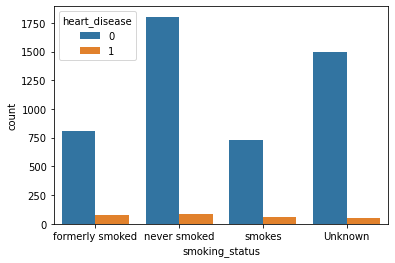

In [11]:
sns.countplot(data=stroke_data[['smoking_status','heart_disease']],x='smoking_status',hue='heart_disease')
plt.show()

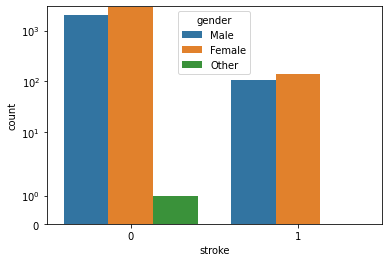

In [12]:
sns.countplot(data=stroke_data[['gender','stroke']],x='stroke', hue='gender')
plt.yscale('symlog')
plt.show()

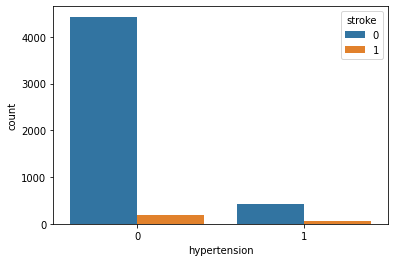

In [ ]:
sns.countplot(data=stroke_data[['hypertension','stroke']],x='hypertension',hue='stroke')
plt.show()

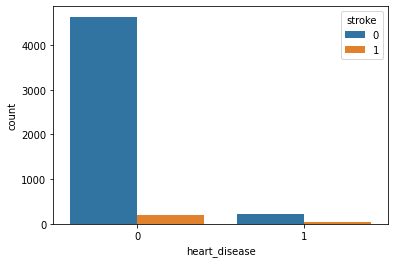

In [13]:
sns.countplot(data=stroke_data[['heart_disease','stroke']],x='heart_disease',hue='stroke')
plt.show()

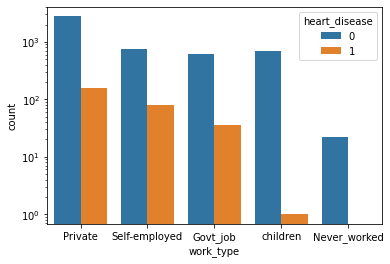

In [14]:
sns.countplot(data=stroke_data[['work_type','heart_disease']],x='work_type',hue='heart_disease')
plt.yscale('log')
plt.show()

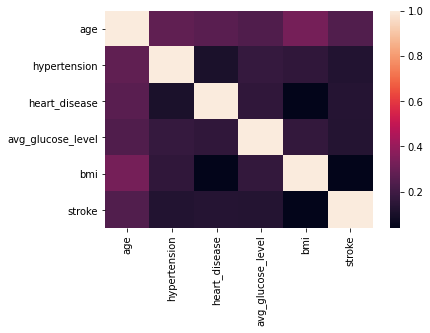

In [15]:
corr = stroke_data.corr()
sns.heatmap(corr)

***Insights ***

Both genders have the chance for stroke
People with history of Hypertension and Heart Disease have shown an increased in percentage of Stroke
Self Employed people have a higher chance compared to other Jobs.

In [16]:
#Converting Categorical Data to Numerical
gender_dict = {'Male': 0, 'Female': 1, 'Other': 2}
ever_married_dict = {'No': 0, 'Yes': 1}
work_type_dict = {'children': 0, 'Never_worked': 1, 'Govt_job': 2, 'Private': 3, 'Self-employed': 4}
residence_type_dict = {'Rural': 0, 'Urban': 1}
smoking_status_dict = {'Unknown': 0, 'never smoked': 1, 'formerly smoked':2, 'smokes': 3}

stroke_data['gender'] = stroke_data['gender'].map(gender_dict)
stroke_data['ever_married'] = stroke_data['ever_married'].map(ever_married_dict)
stroke_data['work_type'] = stroke_data['work_type'].map(work_type_dict)
stroke_data['Residence_type'] = stroke_data['Residence_type'].map(residence_type_dict)
stroke_data['smoking_status'] = stroke_data['smoking_status'].map(smoking_status_dict)

In [17]:
stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,3,1,228.69,36.600000,2,1
1,1,61.0,0,0,1,4,0,202.21,28.893237,1,1
2,0,80.0,0,1,1,3,0,105.92,32.500000,1,1
3,1,49.0,0,0,1,3,1,171.23,34.400000,3,1
4,1,79.0,1,0,1,4,0,174.12,24.000000,1,1


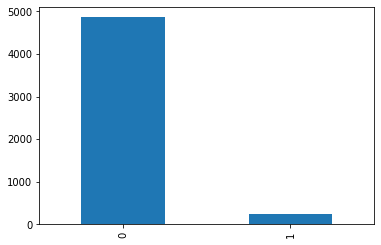

In [18]:
stroke_data['stroke'].value_counts().plot(kind='bar')
plt.show()

The data is imbalanced. To resolve this we are using RandomOverSampler.Before that split the data into features and value to be predicted

In [19]:
X = stroke_data.drop('stroke',axis=1)
Y= stroke_data['stroke']

In [20]:
# Spliting the Data into Train and Test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=40)
Y_train.value_counts()


0    3399
1     178
Name: stroke, dtype: int64

In [21]:
Y_test.value_counts()

0    1462
1      71
Name: stroke, dtype: int64

In [22]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(random_state=123,sampling_strategy=0.4)
x_train1, y_train1 = os.fit_resample(X_train, Y_train)

In [23]:
y_train1.value_counts()

0    3399
1    1359
Name: stroke, dtype: int64

In [24]:
from imblearn.under_sampling import RandomUnderSampler
us = RandomUnderSampler(random_state=123,sampling_strategy=0.4)
x_train2, y_train2 = us.fit_resample(X_train, Y_train)
y_train2.value_counts()

0    445
1    178
Name: stroke, dtype: int64

In [25]:
from collections import Counter
print('Original dataset shape{}'.format(Counter(Y)))
print('Resampled dataset shape - OverSampling{}'.format(Counter(y_train1)))
print('Resampled dataset shape - UnderSampling{}'.format(Counter(y_train2)))

Original dataset shapeCounter({0: 4861, 1: 249})
Resampled dataset shape - OverSamplingCounter({0: 3399, 1: 1359})
Resampled dataset shape - UnderSamplingCounter({0: 445, 1: 178})


In [26]:
train=pd.merge(x_train1,y_train1,left_index=True,right_index=True).reset_index(drop=True)
test=pd.merge(x_train1,y_train1,left_index=True,right_index=True).reset_index(drop=True)

In [27]:
train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,49.0,0,1,1,2,0,88.97,32.600000,1,0
1,1,18.0,0,0,0,3,1,146.59,27.700000,0,0
2,1,46.0,0,0,1,2,0,76.43,22.700000,0,0
3,1,12.0,0,0,0,0,0,108.63,23.400000,1,0
4,1,34.0,0,0,1,3,0,70.53,39.200000,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4753,0,74.0,0,0,1,3,1,72.96,31.300000,3,1
4754,1,81.0,0,1,1,4,0,78.70,19.400000,0,1
4755,0,78.0,0,0,1,4,1,218.46,26.800000,0,1
4756,1,81.0,0,0,1,4,0,81.95,16.900000,1,1


In [29]:
from pycaret.classification import setup
preprocessed_data =setup(data = train, target = 'stroke',test_data=test, session_id=123,
                  normalize=True,transformation=True,
                  remove_multicollinearity=True,
                  remove_outliers=True,
                  ignore_low_variance=True,
                  data_split_stratify=True,                                 
                  use_gpu=True)

,Description,Value
0,session_id,123
1,Target,stroke
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(4758, 11)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


**MODEL**

In [39]:
from pycaret.classification import *

In [31]:
compare_models(include=['lr', 'knn', 'nb', 'dt', 'svm', 'rbfsvm','rf'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9878,1.0000,1.0000,0.9573,0.9781,0.9697,0.9702,1.284
dt,Decision Tree Classifier,0.9669,0.9773,1.0000,0.8916,0.9426,0.9194,0.9225,0.028
knn,K Neighbors Classifier,0.9132,0.9724,0.9902,0.7626,0.8613,0.7997,0.8145,0.241
rbfsvm,SVM - Radial Kernel,0.8225,0.8740,0.6450,0.6839,0.6633,0.5430,0.5439,2.542
lr,Logistic Regression,0.8009,0.8567,0.5815,0.6493,0.6129,0.4795,0.4813,0.075
svm,SVM - Linear Kernel,0.7918,0.0000,0.6053,0.6250,0.6023,0.4643,0.4725,0.033
nb,Naive Bayes,0.7240,0.8083,0.7533,0.4946,0.5969,0.4005,0.4214,0.016


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [32]:
from pycaret.classification import plot_model

In [41]:
rf=create_model('rf',fold=20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0,1.0000,1.0000,1.0000,1.0000
1,0.9912,1.0000,1.0,0.9688,0.9841,0.9780,0.9783
2,0.9956,1.0000,1.0,0.9841,0.9920,0.9890,0.9890
3,0.9956,1.0000,1.0,0.9841,0.9920,0.9890,0.9890
4,0.9868,1.0000,1.0,0.9538,0.9764,0.9672,0.9677
5,0.9823,1.0000,1.0,0.9385,0.9683,0.9560,0.9569
6,0.9912,1.0000,1.0,0.9683,0.9839,0.9778,0.9780
7,0.9823,1.0000,1.0,0.9385,0.9683,0.9560,0.9569
8,0.9823,1.0000,1.0,0.9385,0.9683,0.9560,0.9569
9,0.9912,1.0000,1.0,0.9683,0.9839,0.9778,0.9780


In [42]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [43]:
tuned_model = tune_model(rf,optimize="F1",early_stopping=True,
                         custom_grid={"n_estimators":[i for i in range(100,250)]},
                         choose_better=True,tuner_verbose=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9956,1.0,1.0,0.9840,0.9919,0.9889,0.9890
1,0.9934,1.0,1.0,0.9762,0.9880,0.9834,0.9835
2,0.9912,1.0,1.0,0.9685,0.9840,0.9779,0.9781
3,0.9868,1.0,1.0,0.9535,0.9762,0.9670,0.9675
4,0.9845,1.0,1.0,0.9462,0.9723,0.9616,0.9623
5,0.9801,1.0,1.0,0.9313,0.9644,0.9506,0.9518
6,0.9867,1.0,1.0,0.9531,0.9760,0.9668,0.9674
7,0.9889,1.0,1.0,0.9609,0.9801,0.9724,0.9728
8,0.9889,1.0,1.0,0.9609,0.9801,0.9724,0.9728
9,0.9912,1.0,1.0,0.9685,0.9840,0.9779,0.9781


In [44]:
tuned_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=166,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [45]:
final = finalize_model(tuned_model)

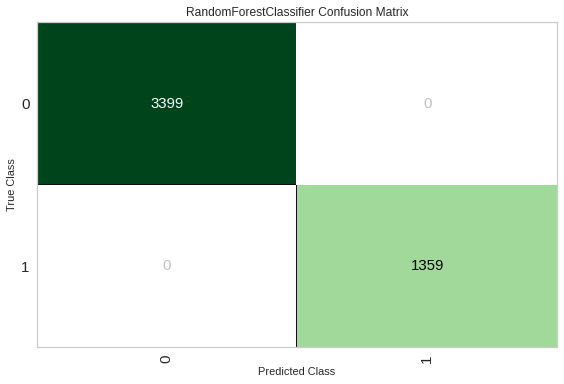

In [46]:
plot_model(final,plot="confusion_matrix")#save=True)

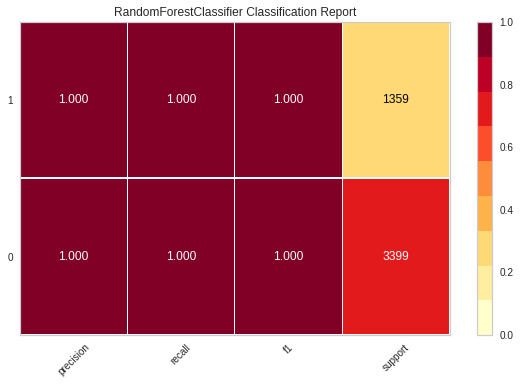

In [49]:
#plot_model(final,plot="class_report",save=True)
plot_model(final,plot="class_report")


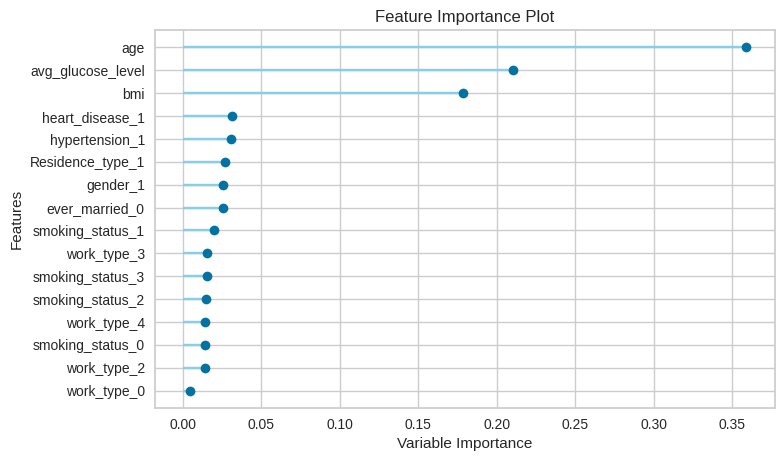

In [50]:
plot_model(final,plot="feature_all")

In [51]:
save_model(final,'Final_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='stroke',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
                                         max_l

In [52]:
new_model=load_model('Final_model')

Transformation Pipeline and Model Successfully Loaded


In [53]:
pip install streamlit

     |████████████████████████████████| 8.0 MB 4.0 MB/s 
     |████████████████████████████████| 111 kB 47.5 MB/s 
     |████████████████████████████████| 75 kB 3.5 MB/s 
     |████████████████████████████████| 4.3 MB 35.2 MB/s 
     |████████████████████████████████| 123 kB 35.3 MB/s 
     |████████████████████████████████| 787 kB 34.3 MB/s 
     |████████████████████████████████| 370 kB 43.7 MB/s 
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13478 sha256=ff6ffc587b5e204bb128af3f51a18f1c839039b380349653a5ae2b793610ff68
  Stored in directory: /root/.cache/pip/wheels/22/f5/18/df711b66eb25b21325c132757d4314db9ac5e8dabeaf196eab
Successfully built blinker
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfu

In [54]:
pip install pyngrok

     |████████████████████████████████| 745 kB 3.1 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19006 sha256=e8503d9776f96357d72b9f87c501ab4fa24ee06a2b96d03fc58623ac1c47d75b
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok


In [55]:
from pyngrok import ngrok
public_url = ngrok.connect(port='80')
print (public_url)

NgrokTunnel: "http://d948-104-196-166-88.ngrok.io" -> "http://localhost:80"


In [ ]:
from google.colab import drive
drive.mount('/content/drive')